In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import pandas as pd
import numpy as np
import os
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('nlp.csv')

# Check the first few rows of the dataset
print(df.head(5))

                                            headline     Main_Label
0  "CWG18; ಕುಸ್ತಿಯಲ್ಲಿ ಚಿನ್ನಗಳಿಸಿದ ರಾಹುಲ್ ಅವಾರೆ, ...         sports
1  ಏಷ್ಯಾ ಕಪ್ 2018: ಪಾಕ್ ವಿರುದ್ಧ ಘರ್ಜಿಸಲು ರೋಹಿತ್ ಸ...         sports
2   ಸಮಂತಾ ವಿಷಯದಲ್ಲಿ 'ಯೂ ಟರ್ನ್'​ ಹೊಡೆದ ನಾಗ ಚೈತನ್ಯ..!,  entertainment
3  PHOTOS: ಐಶ್ ಬೇಬಿ ಸೌಂದರ್ಯದ ಗುಟ್ಟು ರಟ್ಟು: 40 ದಾಟ...  entertainment
4  ಟೀಂ ಇಂಡಿಯಾ ಆಯ್ಕೆ ಸಮಿತಿ ಸದಸ್ಯರ ಸಂಭಾವನೆ ಎಷ್ಟು ಗೊ...         sports


In [ ]:
df_train = pd.read_csv('nlp.csv', header=None)
df_train.head()

,0,1
0,headline,Main_Label
1,"""CWG18; ಕುಸ್ತಿಯಲ್ಲಿ ಚಿನ್ನಗಳಿಸಿದ ರಾಹುಲ್ ಅವಾರೆ, ...",sports
2,ಏಷ್ಯಾ ಕಪ್ 2018: ಪಾಕ್ ವಿರುದ್ಧ ಘರ್ಜಿಸಲು ರೋಹಿತ್ ಸ...,sports
3,"ಸಮಂತಾ ವಿಷಯದಲ್ಲಿ 'ಯೂ ಟರ್ನ್'​ ಹೊಡೆದ ನಾಗ ಚೈತನ್ಯ..!,",entertainment
4,PHOTOS: ಐಶ್ ಬೇಬಿ ಸೌಂದರ್ಯದ ಗುಟ್ಟು ರಟ್ಟು: 40 ದಾಟ...,entertainment


In [ ]:
import re
import string
import demoji


# Define the tokenize function for Kannada language
def tokenize(text, language):
    # Tokenize Kannada text
    tokens = text.split()  # This is a simple example, you may need more sophisticated tokenization
    return tokens

# Define the remove_stopwords function for Kannada language
def remove_stopwords(tokens, language):
    # Define your logic to remove stopwords for Kannada language
    stopwords = [...]  # Define your list of Kannada stopwords
    filtered_tokens = [token for token in tokens if token not in stopwords]
    return filtered_tokens

def clean_text(text):
    # Remove Hashtag, Mention, URLs
    pattern = re.compile(r"(#[\u0C80-\u0CFF]+|@[A-Za-z0-9]+|https?://\S+|www\.\S+|\S+\.[a-z]+|RT @)")
    text = pattern.sub('', text)
    text = " ".join(text.split())

    # Make all text lowercase
    text = text.lower()

    # Tokenize text
    tokens = tokenize(text, 'kn')

    # Remove stopwords
    tokens = remove_stopwords(tokens, 'kn')

    # Join tokens back into text
    cleaned_text = ' '.join(tokens)

    # Removing Punctuations
    remove_punc = re.compile(r"[%s]" % re.escape(string.punctuation))
    cleaned_text = remove_punc.sub('', cleaned_text)

    # Taking care of emojis
    emoji = demoji.findall(cleaned_text)
    for emot in emoji:
        cleaned_text = re.sub(r"(%s)" % (emot), "_".join(emoji[emot].split()), cleaned_text)

    return cleaned_text

# Apply the clean_text function to the Kannada dataset
df['cleaned_text'] = df['headline'].apply(clean_text)


In [ ]:
pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.6 MB/s eta 0:00:00


In [ ]:
print(df.head())

                                            headline     Main_Label  \
0  "CWG18; ಕುಸ್ತಿಯಲ್ಲಿ ಚಿನ್ನಗಳಿಸಿದ ರಾಹುಲ್ ಅವಾರೆ, ...         sports   
1  ಏಷ್ಯಾ ಕಪ್ 2018: ಪಾಕ್ ವಿರುದ್ಧ ಘರ್ಜಿಸಲು ರೋಹಿತ್ ಸ...         sports   
2   ಸಮಂತಾ ವಿಷಯದಲ್ಲಿ 'ಯೂ ಟರ್ನ್'​ ಹೊಡೆದ ನಾಗ ಚೈತನ್ಯ..!,  entertainment   
3  PHOTOS: ಐಶ್ ಬೇಬಿ ಸೌಂದರ್ಯದ ಗುಟ್ಟು ರಟ್ಟು: 40 ದಾಟ...  entertainment   
4  ಟೀಂ ಇಂಡಿಯಾ ಆಯ್ಕೆ ಸಮಿತಿ ಸದಸ್ಯರ ಸಂಭಾವನೆ ಎಷ್ಟು ಗೊ...         sports   

                                        cleaned_text  
0  cwg18 ಕುಸ್ತಿಯಲ್ಲಿ ಚಿನ್ನಗಳಿಸಿದ ರಾಹುಲ್ ಅವಾರೆ ಸುಶ...  
1  ಏಷ್ಯಾ ಕಪ್ 2018 ಪಾಕ್ ವಿರುದ್ಧ ಘರ್ಜಿಸಲು ರೋಹಿತ್ ಸೈ...  
2         ಸಮಂತಾ ವಿಷಯದಲ್ಲಿ ಯೂ ಟರ್ನ್​ ಹೊಡೆದ ನಾಗ ಚೈತನ್ಯ  
3  photos ಐಶ್ ಬೇಬಿ ಸೌಂದರ್ಯದ ಗುಟ್ಟು ರಟ್ಟು 40 ದಾಟಿದ...  
4  ಟೀಂ ಇಂಡಿಯಾ ಆಯ್ಕೆ ಸಮಿತಿ ಸದಸ್ಯರ ಸಂಭಾವನೆ ಎಷ್ಟು ಗೊ...  


In [ ]:
df['cleaned_text'].duplicated().sum() # Checking for duplicate values

53

In [ ]:
df = df[df["headline"]!="Main_Label"]


In [ ]:
data.shape

NameError: name 'data' is not defined

In [ ]:
df['Main_Label'].value_counts()

Main_Label
entertainment    2710
sports           1856
tech              601
Name: count, dtype: int64

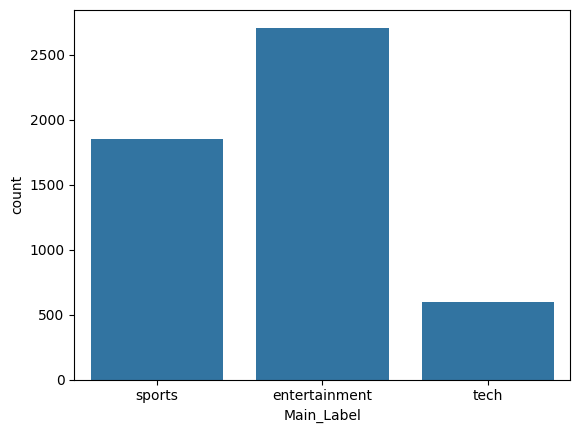

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Main_Label')
plt.show()


In [ ]:

import plotly.express as px
for cyber_type in df.Main_Label.unique():

    top50_word = df.cleaned_text[df.Main_Label==cyber_type].str.split(expand=True).stack().value_counts()[:15]

    fig = px.bar(top50_word, color=top50_word.values, color_continuous_scale=px.colors.sequential.RdPu, custom_data=[top50_word.values])
    fig.update_traces(marker_color='brown')
    fig.update_traces(hovertemplate='<b>Count: </b>%{customdata[0]}')
    fig.update_layout(title=f"Top 15 words for {cyber_type}",
                     template='simple_white',
                     hovermode='x unified')
    fig.show()

In [ ]:
import re
import string
import demoji

# Define the tokenize function for Kannada language
def tokenize(text, language):
    # Tokenize Kannada text
    tokens = text.split()  # This is a simple example, you may need more sophisticated tokenization
    return tokens

# Define the remove_stopwords function for Kannada language
def remove_stopwords(tokens, language):
    # Define your logic to remove stopwords for Kannada language
    stopwords = [...]  # Define your list of Kannada stopwords
    filtered_tokens = [token for token in tokens if token not in stopwords]
    return filtered_tokens

def clean_text(text):
    # Remove Hashtag, Mention, URLs
    pattern = re.compile(r"(#[\u0C80-\u0CFF]+|@[A-Za-z0-9]+|https?://\S+|www\.\S+|\S+\.[a-z]+|RT @)")
    text = pattern.sub('', text)
    text = " ".join(text.split())

    # Make all text lowercase
    text = text.lower()

    # Tokenize text
    tokens = tokenize(text, 'kn')

    # Remove stopwords
    tokens = remove_stopwords(tokens, 'kn')

    # Join tokens back into text
    cleaned_text = ' '.join(tokens)

    # Removing Punctuations
    remove_punc = re.compile(r"[%s]" % re.escape(string.punctuation))
    cleaned_text = remove_punc.sub('', cleaned_text)

    # Taking care of emojis
    emoji = demoji.findall(cleaned_text)
    for emot in emoji:
        cleaned_text = re.sub(r"(%s)" % (emot), "_".join(emoji[emot].split()), cleaned_text)

    return cleaned_text

# Apply the clean_text function to the Kannada dataset
df['cleaned_text'] = df['headline'].apply(clean_text)


In [ ]:
print(df.head())
df['cleaned_text'].duplicated().sum() # Checking for duplicate values
df = df[df["headline"]!="Main_Label"]
df['Main_Label'].value_counts()


                                            headline     Main_Label  \
0  "CWG18; ಕುಸ್ತಿಯಲ್ಲಿ ಚಿನ್ನಗಳಿಸಿದ ರಾಹುಲ್ ಅವಾರೆ, ...         sports   
1  ಏಷ್ಯಾ ಕಪ್ 2018: ಪಾಕ್ ವಿರುದ್ಧ ಘರ್ಜಿಸಲು ರೋಹಿತ್ ಸ...         sports   
2   ಸಮಂತಾ ವಿಷಯದಲ್ಲಿ 'ಯೂ ಟರ್ನ್'​ ಹೊಡೆದ ನಾಗ ಚೈತನ್ಯ..!,  entertainment   
3  PHOTOS: ಐಶ್ ಬೇಬಿ ಸೌಂದರ್ಯದ ಗುಟ್ಟು ರಟ್ಟು: 40 ದಾಟ...  entertainment   
4  ಟೀಂ ಇಂಡಿಯಾ ಆಯ್ಕೆ ಸಮಿತಿ ಸದಸ್ಯರ ಸಂಭಾವನೆ ಎಷ್ಟು ಗೊ...         sports   

                                        cleaned_text  
0  cwg18 ಕುಸ್ತಿಯಲ್ಲಿ ಚಿನ್ನಗಳಿಸಿದ ರಾಹುಲ್ ಅವಾರೆ ಸುಶ...  
1  ಏಷ್ಯಾ ಕಪ್ 2018 ಪಾಕ್ ವಿರುದ್ಧ ಘರ್ಜಿಸಲು ರೋಹಿತ್ ಸೈ...  
2         ಸಮಂತಾ ವಿಷಯದಲ್ಲಿ ಯೂ ಟರ್ನ್​ ಹೊಡೆದ ನಾಗ ಚೈತನ್ಯ  
3  photos ಐಶ್ ಬೇಬಿ ಸೌಂದರ್ಯದ ಗುಟ್ಟು ರಟ್ಟು 40 ದಾಟಿದ...  
4  ಟೀಂ ಇಂಡಿಯಾ ಆಯ್ಕೆ ಸಮಿತಿ ಸದಸ್ಯರ ಸಂಭಾವನೆ ಎಷ್ಟು ಗೊ...  


Main_Label
entertainment    2710
sports           1856
tech              601
Name: count, dtype: int64

In [ ]:

X = df['cleaned_text']  # Feature (raw data)
y = df['Main_Label']  # Target Label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [ ]:
tfidf = TfidfVectorizer(max_features = 5000)

In [ ]:
X_train_tfidf = tfidf.fit_transform(X_train)  # Creating the vocabulary only from the training set to avoid data leakage from
X_test_tfidf = tfidf.transform(X_test)

Shape after RandomOverSampler: (7276, 3)


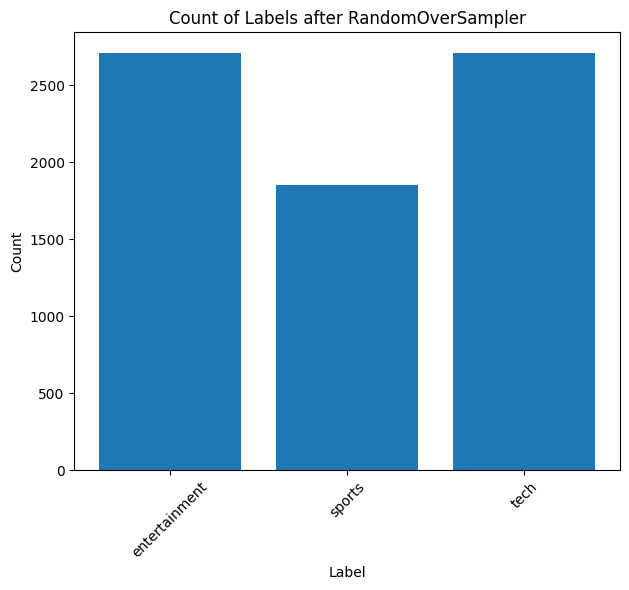

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler, ADASYN
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load your Kannada dataset into a DataFrame
df = pd.read_csv('nlp.csv')

# Assuming 'features' are your independent variables and 'target' is your dependent variable
X = df.drop('headline', axis=1)  # Features
y = df['Main_Label']  # Target

# Step 2: Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 3: Encode categorical features in X using one-hot encoding
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_encoded = preprocessor.fit_transform(X)

# Step 4: Apply RandomOverSampler for oversampling
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X_encoded, y_encoded)

# Check the shape of the oversampled data
print("Shape after RandomOverSampler:", X_resampled_ros.shape)


# Step 6: Plot the count of labels after oversampling
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
unique_labels_ros, label_counts_ros = np.unique(y_resampled_ros, return_counts=True)
plt.bar(label_encoder.inverse_transform(unique_labels_ros), label_counts_ros)
plt.title("Count of Labels after RandomOverSampler")
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Step 7: Split the oversampled data into training and testing sets
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_resampled_ros, y_resampled_ros, test_size=0.3, random_state=42)

# Step 8: Train a model on the oversampled data (using RandomOverSampler)
clf_ros = RandomForestClassifier(random_state=42)
clf_ros.fit(X_train_ros, y_train_ros)
y_pred_ros = clf_ros.predict(X_test_ros)
print("Classification Report for RandomOverSampler:")
print(classification_report(y_test_ros, y_pred_ros))

# Cross-validation to check for overfitting
cv_scores_ros = cross_val_score(clf_ros, X_resampled_ros, y_resampled_ros, cv=5)
print("Cross-validation scores for RandomOverSampler:", cv_scores_ros)




Classification Report for RandomOverSampler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       822
           1       1.00      1.00      1.00       568
           2       1.00      1.00      1.00       793

    accuracy                           1.00      2183
   macro avg       1.00      1.00      1.00      2183
weighted avg       1.00      1.00      1.00      2183



NameError: name 'cross_val_score' is not defined

In [ ]:
# Step 8: Train a model on the oversampled data (using RandomOverSampler)
from sklearn.svm import SVC
from sklearn.metrics import classification_report
clf_ros_svm = SVC(random_state=42)
clf_ros_svm.fit(X_train_ros, y_train_ros)
y_pred_ros_svm = clf_ros_svm.predict(X_test_ros)
print("Classification Report for RandomOverSampler with SVM:")
print(classification_report(y_test_ros, y_pred_ros_svm))

Classification Report for RandomOverSampler with SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       822
           1       1.00      1.00      1.00       568
           2       1.00      1.00      1.00       793

    accuracy                           1.00      2183
   macro avg       1.00      1.00      1.00      2183
weighted avg       1.00      1.00      1.00      2183



(7276, 1)


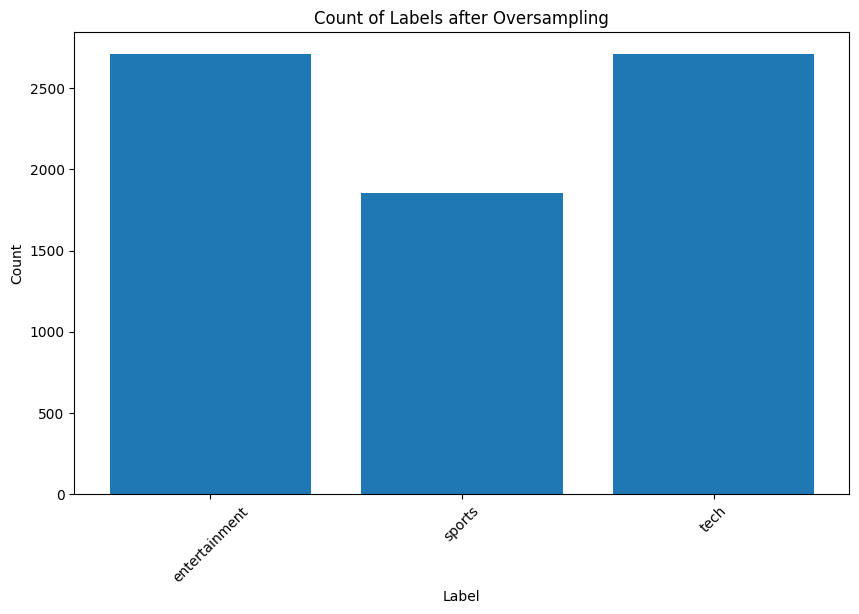

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Step 1: Load your Kannada dataset into a DataFrame
df = pd.read_csv('nlp.csv')

# Assuming 'features' are your independent variables and 'target' is your dependent variable
X = df.drop('headline', axis=1)  # Features
y = df['Main_Label']  # Target

# Step 2: Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Step 3: Apply RandomOverSampler for oversampling
oversampler = RandomOverSampler(sampling_strategy="minority")
oversampled_data, oversampled_target = oversampler.fit_resample(X, y_categorical)

# Step 4: Check the shape of the oversampled data
print(oversampled_data.shape)

# Plot the count of labels after oversampling
plt.figure(figsize=(10, 6))
plt.bar(label_encoder.classes_, oversampled_target.sum(axis=0))
plt.title("Count of Labels after Oversampling")
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
X_train_tfidf

<3616x1909 sparse matrix of type '<class 'numpy.float64'>'
	with 22041 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_tfidf

<1551x1909 sparse matrix of type '<class 'numpy.float64'>'
	with 9143 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tfidf_array_train = X_train_tfidf.toarray()   # Converting the sparse matrix to a numpy array (dense matrix)
tfidf_array_test = X_test_tfidf.toarray()     # Converting the sparse matrix to a numpy array (dense matrix)
scaled_X_train = scaler.fit_transform(tfidf_array_train)  # Fitting on only training data to avoid data leakage from test data
scaled_X_test = scaler.transform(tfidf_array_test) # and then tranforming both training and testing data

In [ ]:
from sklearn.decomposition import PCA

# Choose a value for n_components within the valid range
# For example, you could set it to min(n_samples, n_features)
NUM_COMPONENTS = min(scaled_X_train.shape[0], scaled_X_train.shape[1])

pca = PCA(n_components=NUM_COMPONENTS)
reduced = pca.fit_transform(scaled_X_train)


In [ ]:
variance_explained = np.cumsum(pca.explained_variance_ratio_)  # Calculating the cumulative explained variance by the components

Text(0, 0.5, 'Cumulative explained variance')

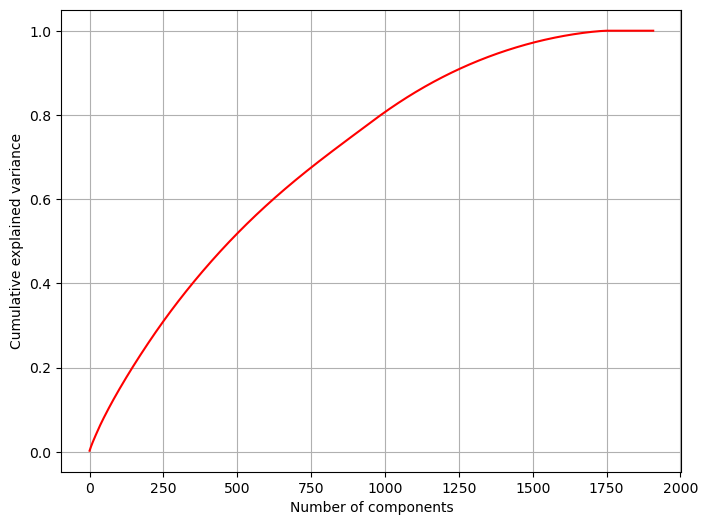

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(NUM_COMPONENTS),variance_explained, color='r')
ax.grid(True)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

In [ ]:
final_pca = PCA(0.9)
reduced_90 = final_pca.fit_transform(scaled_X_train) # Number of Components explaining 90% variance in the training data

In [ ]:
reduced_90_test = final_pca.transform(scaled_X_test)


In [ ]:
reduced_90.shape


(3616, 1225)

In [ ]:
## Model Training
import sklearn
print(sklearn.__version__)


1.3.2


In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# LOGISTIC REGRESSION with the complete data
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
log_model_pca = LogisticRegression()
log_model_pca.fit(reduced_90, y_train)
preds_log_model_pca = log_model_pca.predict(reduced_90_test)
print(classification_report(y_test, preds_log_model_pca))
log_model = LogisticRegression(solver = 'saga')
param_grid = {'C': np.logspace(0, 10, 5)}
grid_log_model = HalvingGridSearchCV(log_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_log_model.fit(X_train_tfidf, y_train)
preds_grid_log_model = grid_log_model.predict(X_test_tfidf)
print(y_test, preds_grid_log_model)

               precision    recall  f1-score   support

entertainment       0.83      0.86      0.85       815
       sports       0.80      0.76      0.78       568
         tech       0.59      0.61      0.60       168

     accuracy                           0.79      1551
    macro avg       0.74      0.74      0.74      1551
 weighted avg       0.80      0.79      0.79      1551



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



1564           sports
2916    entertainment
3413    entertainment
3159           sports
1397    entertainment
            ...      
4470    entertainment
1519           sports
1738             tech
2351           sports
1023           sports
Name: Main_Label, Length: 1551, dtype: object ['sports' 'entertainment' 'sports' ... 'tech' 'sports' 'sports']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [ ]:
# SUPPORT VECTOR MACHINES
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
C = [1e-5, 1e-4, 1e-2, 1e-1, 1]
param_grid = {'C': C}
grid_svm_model = HalvingGridSearchCV(svm_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_svm_model.fit(X_train_tfidf, y_train)
preds_grid_svm_model = grid_svm_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_svm_model))

               precision    recall  f1-score   support

entertainment       0.84      0.92      0.88       815
       sports       0.86      0.82      0.84       568
         tech       0.77      0.56      0.65       168

     accuracy                           0.84      1551
    macro avg       0.82      0.76      0.79      1551
 weighted avg       0.84      0.84      0.84      1551



In [ ]:
# RANDOM FORESTS
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)
n_estimators = [64, 100, 128]
bootstrap = [True, False] # Bootstrapping is true by default
param_grid = {'n_estimators': n_estimators, 'bootstrap': bootstrap}
grid_rf_model = HalvingGridSearchCV(rf_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_rf_model.fit(X_train_tfidf, y_train)
preds_grid_rf_model = grid_rf_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_rf_model))

               precision    recall  f1-score   support

entertainment       0.80      0.89      0.84       815
       sports       0.82      0.77      0.79       568
         tech       0.75      0.48      0.58       168

     accuracy                           0.80      1551
    macro avg       0.79      0.71      0.74      1551
 weighted avg       0.80      0.80      0.80      1551



In [ ]:
# NEURAL NETWORKS
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(activation = 'logistic', max_iter = 10)  # Sigmoid Activation Function
param_grid = {'learning_rate_init': [0.001, 0.0015, 0.002, 0.0025]}
grid_nn_model = HalvingGridSearchCV(nn_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_nn_model.fit(X_train_tfidf, y_train)
preds_grid_nn_model = grid_nn_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_nn_model))

               precision    recall  f1-score   support

entertainment       0.79      0.93      0.86       815
       sports       0.82      0.80      0.81       568
         tech       0.95      0.21      0.35       168

     accuracy                           0.81      1551
    macro avg       0.85      0.65      0.67      1551
 weighted avg       0.82      0.81      0.78      1551



C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import classification_report

# Define base estimator
base_estimator = DecisionTreeClassifier()

# Initialize AdaBoostClassifier
adaboost_model = AdaBoostClassifier(base_estimator=base_estimator)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Initialize HalvingGridSearchCV
grid_adaboost_model = HalvingGridSearchCV(adaboost_model, param_grid=param_grid, n_jobs=-1, min_resources='exhaust', factor=3)

# Fit the model
grid_adaboost_model.fit(X_train_tfidf, y_train)
# Make predictions
preds_grid_adaboost_model = grid_adaboost_model.predict(X_test_tfidf)

# Print classification report
print(classification_report(y_test, preds_grid_adaboost_model))


C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



               precision    recall  f1-score   support

entertainment       0.77      0.80      0.78       815
       sports       0.74      0.74      0.74       568
         tech       0.55      0.45      0.50       168

     accuracy                           0.74      1551
    macro avg       0.69      0.66      0.67      1551
 weighted avg       0.74      0.74      0.74      1551

